# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


In [2]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_unimodal import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results_leonardo/20D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-16 17:25:23.369305: Importing os...
2024-04-16 17:25:23.369661: Importing sys...
Visible devices: [1]
2024-04-16 17:25:23.369892: Importing timer from timeit...
2024-04-16 17:25:23.369957: Setting env variables for tf import (only device(s) [1] will be available)...
2024-04-16 17:25:23.370083: Importing numpy...
2024-04-16 17:25:23.479793: Importing matplotlib...
2024-04-16 17:25:23.819213: Importing h5py...
2024-04-16 17:25:23.842721: Importing importlib.util...
2024-04-16 17:25:23.842818: Importing json...
2024-04-16 17:25:23.842879: Importing pandas...
2024-04-16 17:25:24.254830: Importing random...
2024-04-16 17:25:24.254960: Importing scipy utils...
2024-04-16 17:25:24.625757: Importing subprocess...
2024-04-16 17:25:24.625873: Importing tensorflow...
Tensorflow version: 2.16.1
2024-04-16 17:25:27.716544: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-04-16 17:25:28.795990: Importing timeit...
2024-04-16 17:25:28.796077: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-04-16 17:25:33.344040: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #1, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-04-16 17:25:33.376676: All done.


# Model definition

In [3]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = 0.,
                                                             eps_scale = 0.,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
dist_2 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = eps_loc,
                                                             eps_scale = eps_scale,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


# Fixed $n=20000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 20_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 20_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,20000,10000,10000000,float64,0,True,False,None,True,...,20,0,True,20,0,float64,20,200000000,False,5


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 500,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results_leonardo/20D_unimodal/20D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results_leonardo/20D_unimodal/20D_20K/null_hypothesis/FN.json
Loading fpd from results_leonardo/20D_unimodal/20D_20K/null_hypothesis/FPD.json
Loading kpd from results_leonardo/20D_unimodal/20D_20K/null_hypothesis/KPD.json
Loading ks from results_leonardo/20D_unimodal/20D_20K/null_hypothesis/KS.json
Loading sks from results_leonardo/20D_unimodal/20D_20K/null_hypothesis/SKS.json
Loading swd from results_leonardo/20D_unimodal/20D_20K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7485835927158977], [0.95, [9500, 500], 1.033776381540505], [0.99, [9900, 100], 1.2475201008590582]]
Computing time for metric fn: 9.69810863607563
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.11582248190997987], [0.95, [9500, 500], 0.16861427140297167], [0.99, [9900, 100], 0.28060237149143374]]
Computing time for metric fpd: 259.1181438108906
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.47344702138518713], [0.95, [9500, 500], 0.5156398157246667], [0.99, [9900, 100], 0.5468218312632]]
Computing time for metric kpd: 18913.08449595305
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9120000898838043], [0.95, [9500, 500], 1.1075008660554886], [0.99, [9900, 100], 1.2549996376037598]]
Computing time for metric ks: 100.53717305394821
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9048002772033215], [0.95, [9500, 500], 1.0811004787683487], [0.99, [9900, 100], 1.2127505615353584]]
Computing time for metric sks: 396.1223181020468

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f4b1893bce0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 20000, 'ba...",500,$\overline{\|\cdot\|}_{F}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.7485835927158977], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f4b1893bd80>,"lambda ns, ndims: 1000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",100,$d_{\mathrm{FPD}}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.11582248190997987], [0..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f4b140880e0>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1,$d_{\mathrm{KPD}}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.47344702138518713], [0..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f4b14088180>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",10000,$\overline{D}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.9120000898838043], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f4b14088220>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{D}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.9048002772033215], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f4b140882c0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{W}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.2947600178370888], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f4b14088360>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$t_{\mu}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,[]


### Plots of null-distributions

mu = 0.6813296237439926 +/- 0.00037890648929053315
sigma = 0.1946552052452061 +/- 0.001672019019464477


/tmp/ipykernel_1258190/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1258190/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1258190/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1258190/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


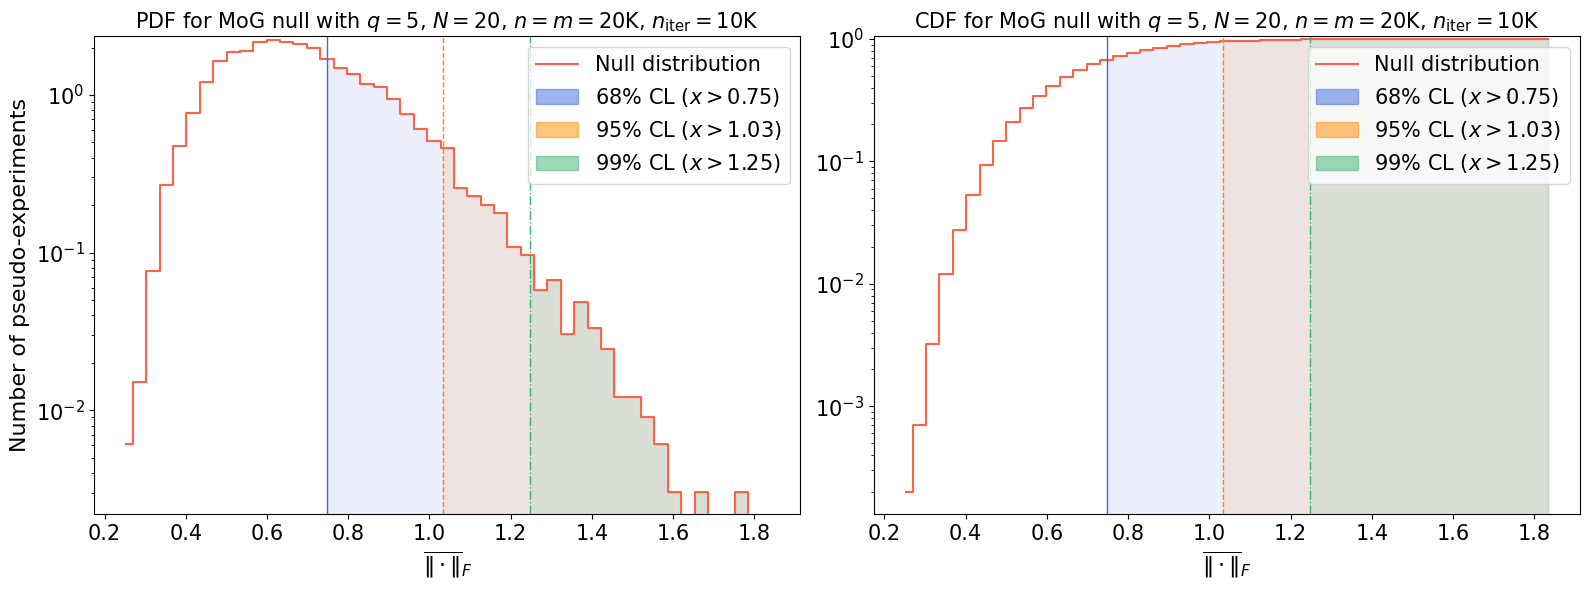

Time elapsed: 1.482032123953104 seconds.
mu = 0.11199703219235012 +/- 1.3270502216664146e-05
sigma = 0.036428700521243064 +/- 0.0006519430998089134


/tmp/ipykernel_1258190/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1258190/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1258190/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1258190/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


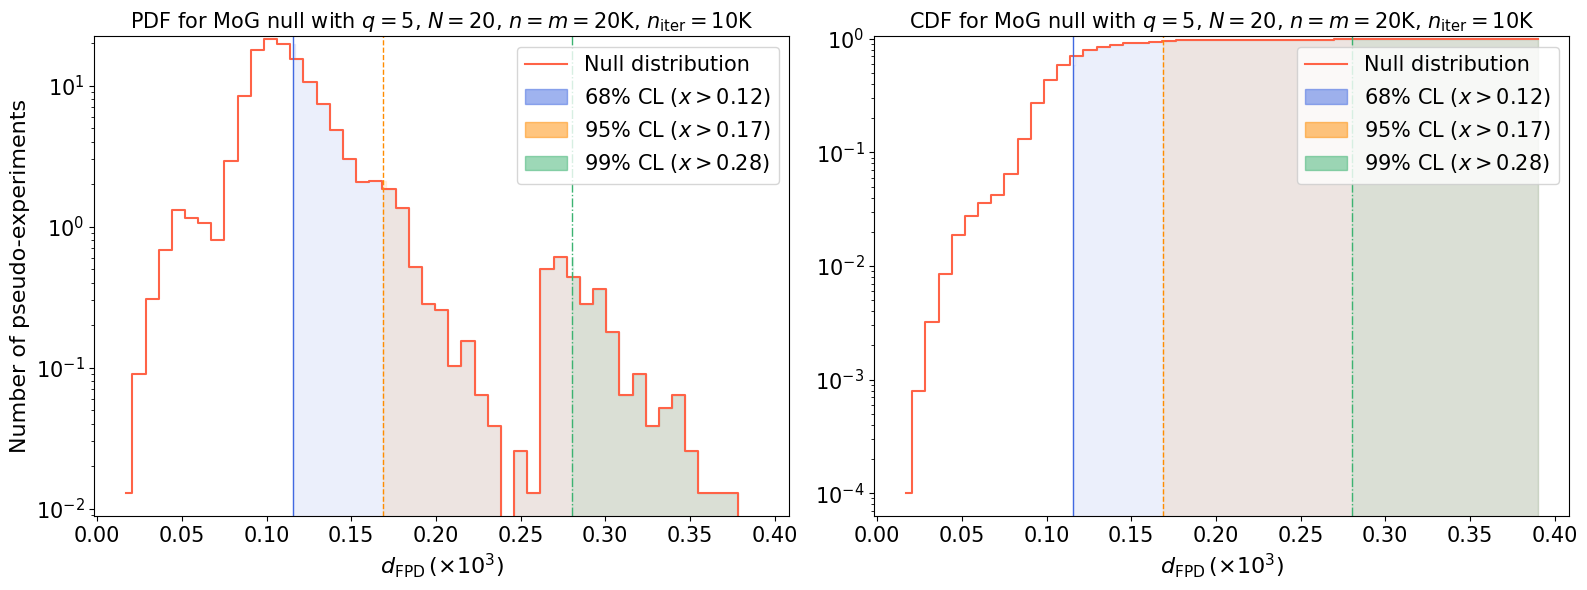

Time elapsed: 1.0607051050756127 seconds.
mu = 0.45970185353897414 +/- 1.0815171433572777e-05
sigma = 0.032886427950710576 +/- 0.0002471158078606443


/tmp/ipykernel_1258190/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1258190/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1258190/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1258190/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


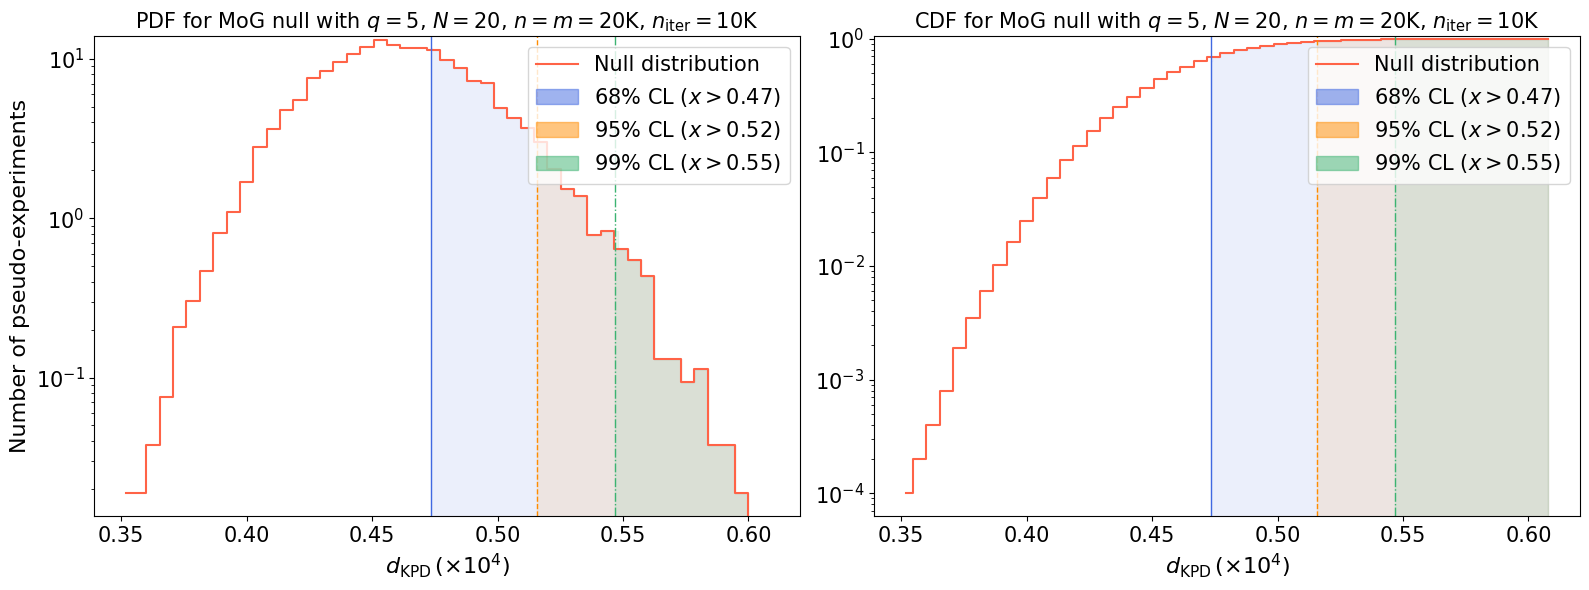

Time elapsed: 1.0048875221982598 seconds.
mu = 0.8676754004731775 +/- 0.00016787066129602296
sigma = 0.12956491087328503 +/- 0.001113531509799755


/tmp/ipykernel_1258190/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1258190/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1258190/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1258190/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


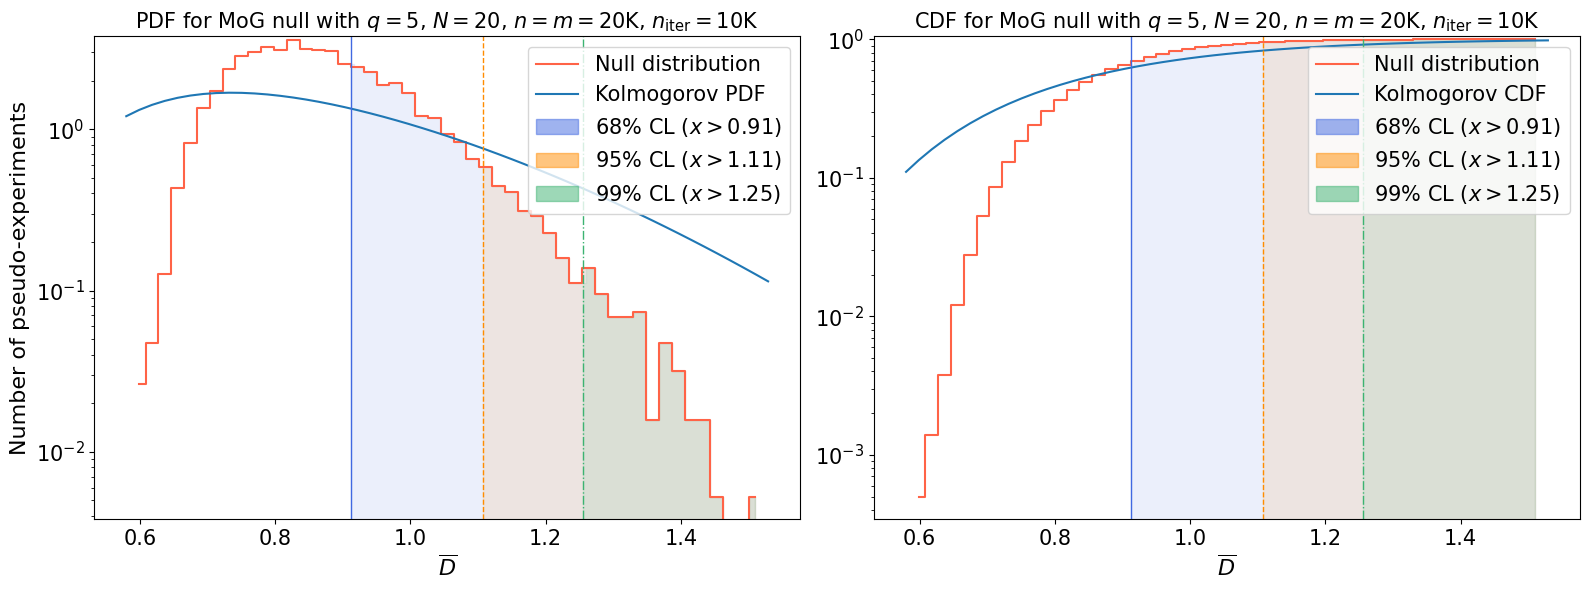

Time elapsed: 1.2488289528992027 seconds.
mu = 0.8658526310138405 +/- 0.00013098520621847905
sigma = 0.11444876854666416 +/- 0.0009489896381201503


/tmp/ipykernel_1258190/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1258190/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1258190/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1258190/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


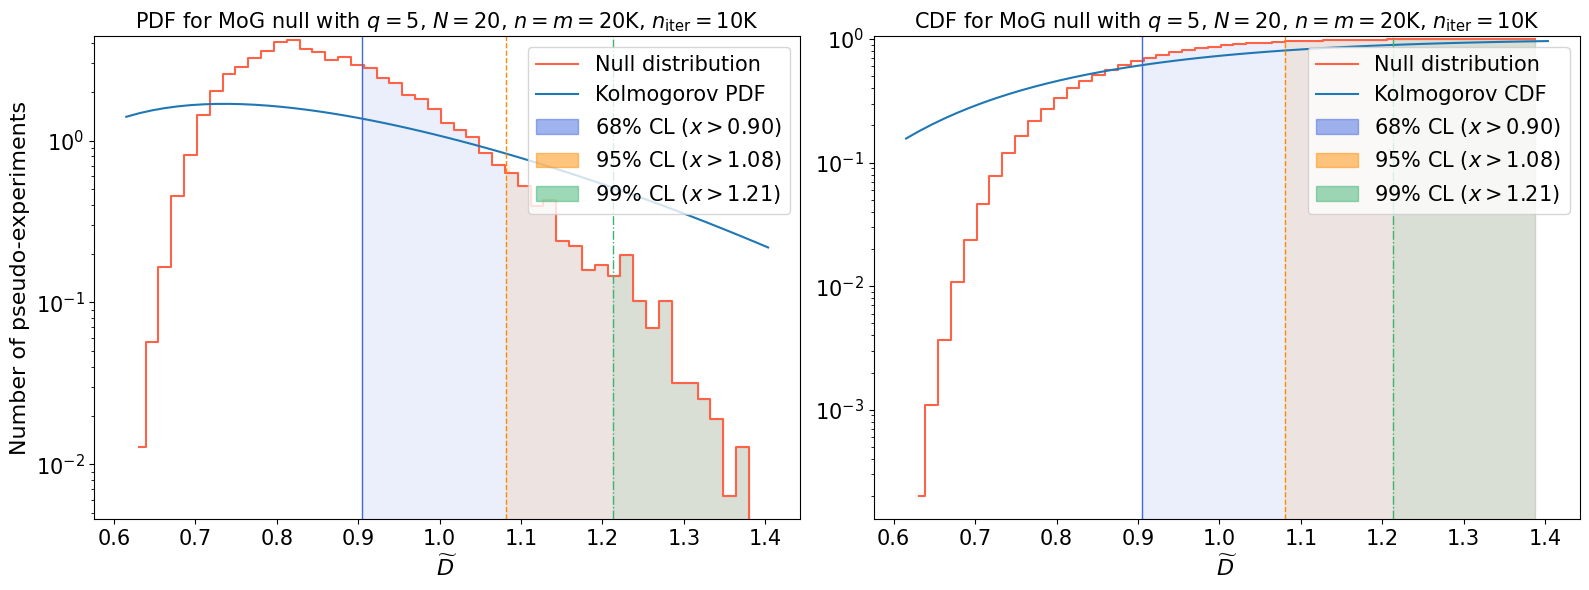

Time elapsed: 1.3000382028985769 seconds.
mu = 0.2802814187915494 +/- 2.8090848521128723e-05
sigma = 0.0530008004855858 +/- 0.0005176362112236936


/tmp/ipykernel_1258190/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1258190/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1258190/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1258190/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


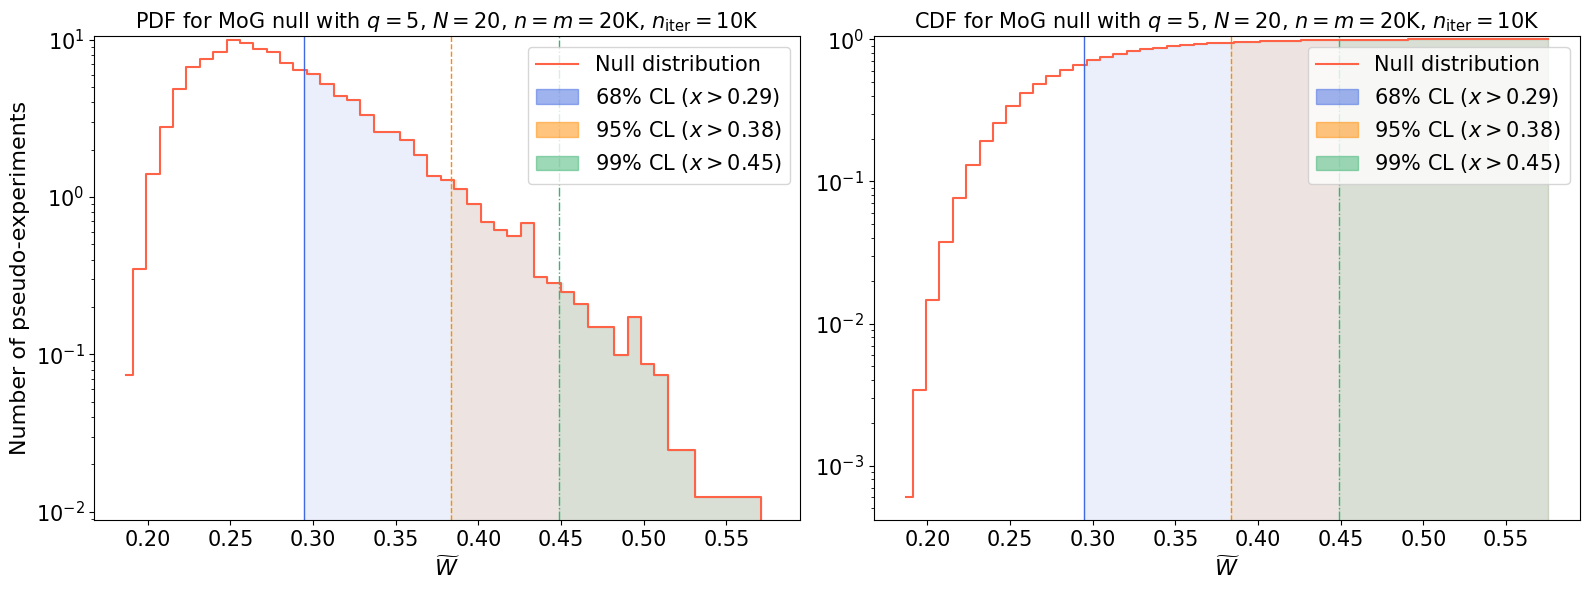

Time elapsed: 0.9921295729000121 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f4b1893bce0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 20000, 'ba...",500,$\overline{\|\cdot\|}_{F}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.7485835927158977], [0....",results_leonardo/20D_unimodal/20D_20K/null_hyp...
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f4b1893bd80>,"lambda ns, ndims: 1000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",100,$d_{\mathrm{FPD}}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.11582248190997987], [0...",results_leonardo/20D_unimodal/20D_20K/null_hyp...
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f4b140880e0>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1,$d_{\mathrm{KPD}}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.47344702138518713], [0...",results_leonardo/20D_unimodal/20D_20K/null_hyp...
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f4b14088180>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",10000,$\overline{D}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.9120000898838043], [0....",results_leonardo/20D_unimodal/20D_20K/null_hyp...
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f4b14088220>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{D}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.9048002772033215], [0....",results_leonardo/20D_unimodal/20D_20K/null_hyp...
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f4b140882c0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{W}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,"[[0.68, [6800, 3199], 0.2947600178370888], [0....",results_leonardo/20D_unimodal/20D_20K/null_hyp...
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f4b14088360>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$t_{\mu}$,results_leonardo/20D_unimodal/20D_20K/null_hyp...,[],NaN


In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [18]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [19]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [20]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.02,
                                                 eps_min = 0.,
                                                 eps_max = 50.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with off deformation already loaded.
Exclusion limits for fn with cov deformation already loaded.
Exclusion limits for fn with mean_std deformation already loaded.
Exclusion limits for fn with mean_off deformation already loaded.
Exclusion limits for fn with mean_cov deformation already loaded.
Computing exclusion limits for fpd with mean deformation.

=============== fpd - only mean ===============

------------ 1 ------------
eps = 25.0
statistic = 58005.494709611026 - next threshold = 0.16861427140297167 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9999883725649021

------------ 2 ------------
eps = 12.5
statistic = 14624.24460321986 - next threshold = 0.16861427140297167 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9999538814258337

------------ 3 ------------
eps = 6.25
statistic = 3728.1016913435565 - 

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Computing exclusion limits for lr with std deformation.

=============== lr - only std ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 20000
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400